In [1]:
#!/usr/bin/python3

#Imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load Lawful Permanent Residents 2020 Data Tables
# Data from: https://www.dhs.gov/immigration-statistics/yearbook/2020
directory = "./data/lawful2020/"

# Title: PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020
lawful2020_table1_in = pd.read_excel(directory + "fy2020_table1.xlsx", skiprows=3, nrows=60)

# Reformat into 2 columns: Year and Number
lawful2020_table1 = pd.DataFrame(columns=['Year', 'Number'])
lawful2020_table1['Year'] = lawful2020_table1_in['Year']
lawful2020_table1['Number'] = lawful2020_table1_in['Number']
for i in range(3):
    temp = pd.DataFrame(columns=['Year','Number'])
    current_col_year = 'Year.' + str(i + 1)
    current_col_number = 'Number.' + str(i + 1)
    temp['Year'] = lawful2020_table1_in[current_col_year]
    temp['Number'] = lawful2020_table1_in[current_col_number]
    lawful2020_table1 = pd.concat([lawful2020_table1, temp])
    
# Remove rows with NaN
lawful2020_table1 = lawful2020_table1.dropna()

# Modify one instance of a string
lawful2020_table1.loc[lawful2020_table1['Year'] == "1976¹"] = 1976

print(lawful2020_table1.describe())

             Number
count  2.010000e+02
mean   4.288578e+05
std    3.651173e+05
min    1.976000e+03
25%    1.411320e+05
50%    3.216250e+05
75%    6.033220e+05
max    1.826595e+06


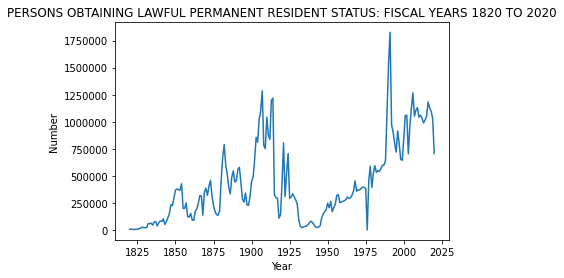

In [3]:
# Plot simple chart
plt.plot(lawful2020_table1['Year'], lawful2020_table1['Number'])
plt.xlabel("Year")
plt.ylabel("Number")
plt.title("PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020")
plt.ticklabel_format(style='plain')
plt.show()

Here, we can see a general upward trend for persons obtaining lawful permanent resident status over the past 200 years in the United States.

In [4]:
# Load Lawful Permanent Residents 2020 Supplementary Data Tables

# Title: PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020
lawful2020_table2_in = pd.read_excel(directory + "fy2020_table2.xlsx", skiprows=3, nrows=88)
df = lawful2020_table2_in

# Make sure all column names are strings (2020 label saved as int)
df = df.rename(columns={2020:'2020'})

# Rename a column
df = df.rename(columns={"Region and country of last residence1": "Region"})

# Rename a row element
df.iloc[87]['Region'] = 'Not Specified'

# Replace NaN with 0, replace dashes with 0
df = df.fillna(0)
df.loc[:, df.columns != 'Region'] = df.loc[:, df.columns != 'Region'].replace('-',0, regex=True)

# Combine 2010-2019 and 2020 columns
df['2010 to 2020'] = df['2010 to 2019'] + df['2020']

# Remove a column
df = df.drop('2010 to 2019', axis=1)
df = df.drop('2020', axis=1)

print(df.head())

               Region 1820 to 1829 1830 to 1839 1840 to 1849 1850 to 1859  \
0               Total       128502       538381      1427337      2814554   
1              Europe        99618       422853      1369423      2622617   
2  Austria-Hungary2,3            0            0            0            0   
3          Austria2,3            0            0            0            0   
4          Hungary2,3            0            0            0            0   

  1860 to 1869 1870 to 1879 1880 to 1889 1890 to 1899 1900 to 1909  ...  \
0      2081261      2742137      5248568      3694294      8202388  ...   
1      1880389      2252050      4638684      3576411      7572569  ...   
2         3375        60127       314787       534059      2001376  ...   
3         2700        54529       204805       268218       532416  ...   
4          483         5598       109982       203350       685567  ...   

  1920 to 1929 1930 to 1939 1940 to 1949 1950 to 1959 1960 to 1969  \
0      4295510  

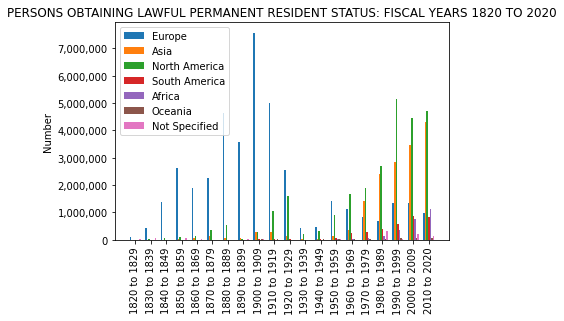

In [6]:
# Create plot of persons by continent

continent_data = df[(df['Region'] == 'Europe') | (df['Region'] == 'Asia') | (df['Region'] == 'America') | (df['Region'] == 'South America') | (df['Region'] == 'Africa') | (df['Region'] == 'Oceania') | (df['Region'] == 'Not Specified')]

labels = continent_data.iloc[:, 0].tolist()
europe_data = continent_data.iloc[0,1:].tolist()
asia_data = continent_data.iloc[1,1:].tolist()
america_data = continent_data.iloc[2,1:].tolist()
sa_data = continent_data.iloc[3,1:].tolist()
africa_data = continent_data.iloc[4,1:].tolist()
oceania_data = continent_data.iloc[5,1:].tolist()
other_data = continent_data.iloc[6,1:].tolist()

bar_labels = continent_data.columns.tolist()
bar_labels = bar_labels[1:]

x = np.arange(len(europe_data))
width = 0.1
fig, ax = plt.subplots()

europe_bars = ax.bar((x - (3 * width)), europe_data, width, label='Europe')
asia_bars = ax.bar((x - (2 * width)), asia_data, width, label='Asia')
america_bars = ax.bar((x - (1 * width)), america_data, width, label='North America')
sa_bars = ax.bar(x, sa_data, width, label='South America')
africa_bars = ax.bar((x + (1 * width)), africa_data, width, label='Africa')
oceania_bars = ax.bar((x + (2 * width)), oceania_data, width, label='Oceania')
other_bars = ax.bar((x + (3 * width)), other_data, width, label='Not Specified')

ax.set_xticks(x, bar_labels, rotation='vertical')
ax.set_ylabel('Number')
ax.set_title('PERSONS OBTAINING LAWFUL PERMANENT RESIDENT STATUS: FISCAL YEARS 1820 TO 2020')
ax.legend()

ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, a: format(int(x), ',')))

plt.show()


You'll have to zoom in to properly see the bars, but we can see general immigration trends by continent over the past 200 years.